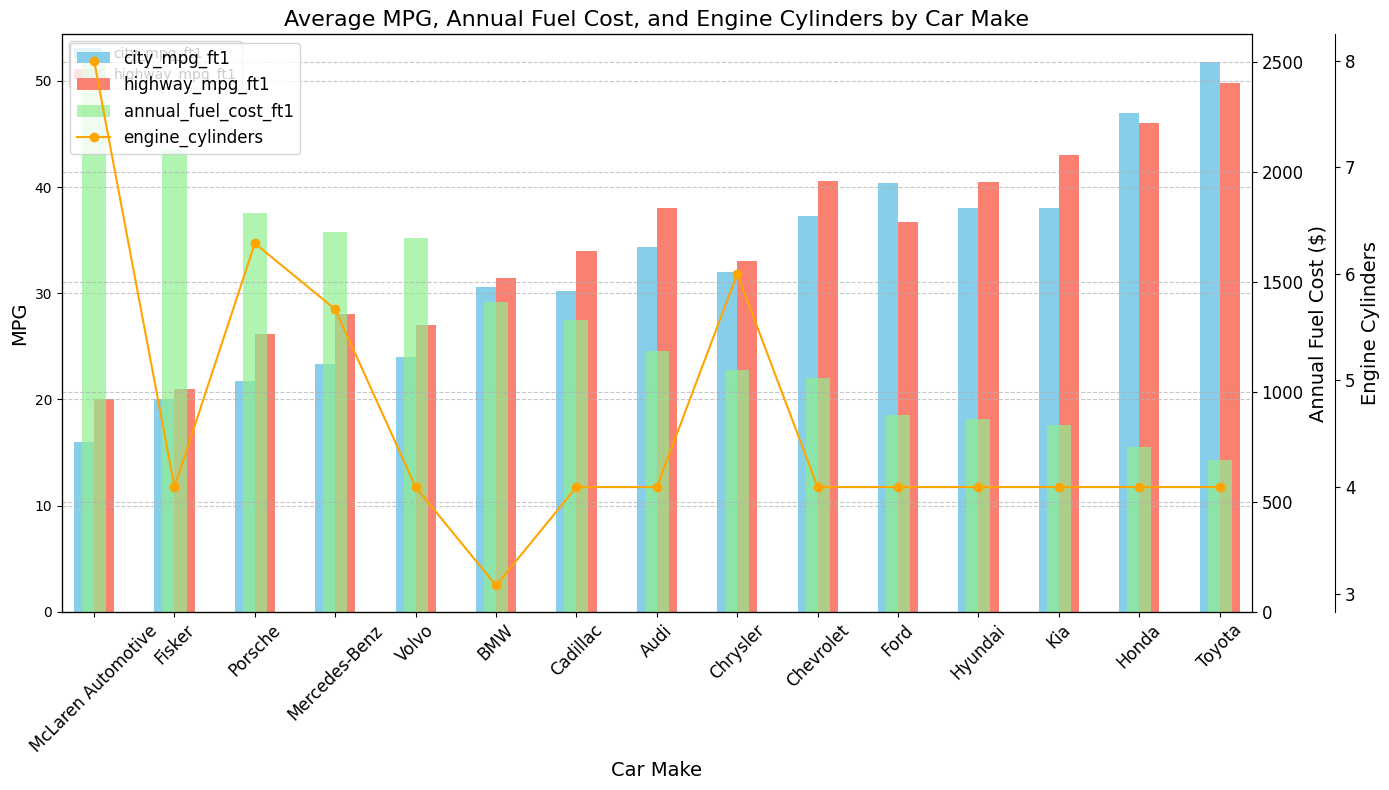

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate estimated annual fuel cost for rows where 'annual_fuel_cost_ft1' is missing
mean_gas_price = 3.00  # Placeholder for the average cost of gas in dollars per gallon
days_in_year = 365  # Number of days in a year

# Calculate mean between city and highway mpg
df['mean_mpg'] = (df['city_mpg_ft1'] + df['highway_mpg_ft1']) / 2

# Calculate estimated annual fuel cost
df['estimated_annual_fuel_cost'] = (df['mean_mpg'] * mean_gas_price * days_in_year)

# Fill NaN values in the 'annual_fuel_cost_ft1' column with the calculated estimated annual fuel cost
df['annual_fuel_cost_ft1'] = df['annual_fuel_cost_ft1'].fillna(df['estimated_annual_fuel_cost'])

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft1', 'engine_cylinders']].mean()

# Sort the DataFrame by 'annual_fuel_cost_ft1' in descending order
mileage_cost_cylinder_by_make = mileage_cost_cylinder_by_make.sort_values(by='annual_fuel_cost_ft1', ascending=False)

# Plot the bar graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot city and highway mpg on the primary y-axis
mileage_cost_cylinder_by_make[['city_mpg_ft1', 'highway_mpg_ft1']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_ylabel('MPG', fontsize=14)
ax1.set_xlabel('Car Make', fontsize=14)
ax1.tick_params(axis='x', rotation=45, labelsize=12)  # Adjust x-axis label rotation and font size
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for annual fuel cost
ax2 = ax1.twinx()
mileage_cost_cylinder_by_make['annual_fuel_cost_ft1'].plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7, width=0.3)
ax2.set_ylabel('Annual Fuel Cost ($)', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)  # Adjust y-axis font size
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Create another secondary y-axis for engine cylinders
ax3 = ax1.twinx()
mileage_cost_cylinder_by_make['engine_cylinders'].plot(kind='line', ax=ax3, color='orange', marker='o')
ax3.set_ylabel('Engine Cylinders', fontsize=14)
ax3.tick_params(axis='y', labelsize=12)  # Adjust y-axis font size
ax3.spines['right'].set_position(('outward', 60))

# Adjust legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left', fontsize=12)  # Adjust legend font size

# Title
plt.title('Average MPG, Annual Fuel Cost, and Engine Cylinders by Car Make', fontsize=16)
plt.savefig('fuel_economy_analysis.png')

# Show the plot
plt.tight_layout()
plt.show()